# Gaussian Mixture Models

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [331]:
df2 = pd.read_csv('dim2.txt', delim_whitespace=True, header=None)
df5 = pd.read_csv('dim5.txt', delim_whitespace=True, header=None)
df10 = pd.read_csv('dim10.txt', delim_whitespace=True, header=None)
df15 = pd.read_csv('dim15.txt', delim_whitespace=True, header=None)

In [3]:
df_s1=pd.read_csv('s1.txt', delim_whitespace=True, header=None)

In [332]:
df2_half=df2.loc[:674]
df5_half=df5.loc[:1687]
df10_half=df10.loc[:3374]
df15_half=df15.loc[:6749]

In [93]:
len(df2)
len(df5)
len(df10)
len(df15)
len(df2_half)
len(df5_half)
len(df10_half)
len(df15_half)

1351

3376

6751

10126

675

1688

3375

6750

In [155]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

UsageError: Line magic function `%install_ext` not found.


Here the dataset can be changed and same steps can be re-run to calculate metrics specific to that dataset

#### Step 1: Clustering the dataset and timing it

In [1]:
#%%timeit
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=15,covariance_type='full').fit(df2)
labels = gmm.predict(df_s1)

NameError: name 'df2' is not defined

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=15,covariance_type='full').fit(df2)
labels = gmm.predict(df_s1)

#### Step 2: Calculating silhouette

In [367]:
from sklearn.metrics import silhouette_score
score_sil = silhouette_score(df2, labels) 
score_sil

0.7234867821265946

#### Step 3: Calculating calinski harabaz

In [368]:
from sklearn.metrics import calinski_harabaz_score
score_ch = calinski_harabaz_score(df2, labels) 
score_ch

10077.199973226137

#### Step 4: Calculating davies bouldin

In [412]:
from sklearn.metrics import davies_bouldin_score
score_db = davies_bouldin_score(df2, labels) 
score_db

/Users/roswal/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.36646524840217065

### Code to show probabilistic cluster assignment

In [150]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

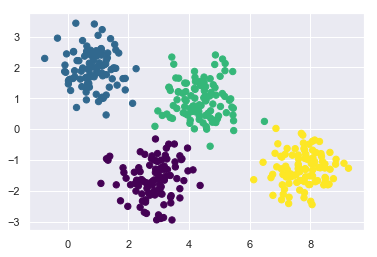

In [152]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [153]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.537 0.463]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]]


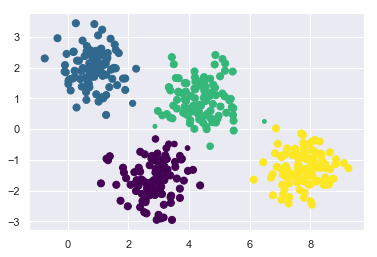

In [154]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);